# Regresión lineal para predecir resultados en jugadores de tenis 

In [95]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [96]:
df = pd.read_csv('tennis_stats.csv')
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


En primer lugar vamos a hacer un análisis de la información que nos dan. Nos interesa saber la cantidad de jugadores en la tabla y el rango de años.

In [97]:
df.Player.nunique()

438

In [98]:
df.Year.unique()


array([2016, 2017, 2010, 2014, 2011, 2009, 2012, 2013, 2015], dtype=int64)

In [99]:
df.columns

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')

Queremos predecir los resultados que va a tener un jugador en función de sus características de juego. Como vimos en la tabla hay dos columnas en las que se muestran los partidos ganados 'Wins' y los partidos perdidos 'Losses' en el año. Primero vamos a encontrar el rango de estas columnas, luego vamos a generar otra columna con la razón de partidos ganados sobre el total. Esta columna va a ser la que vamos a predecir.

In [100]:
df.Wins.max()


48

In [101]:
df.Wins.min()

0

In [102]:
df.Losses.max()

36

In [103]:
df.Losses.min()

0

In [104]:
df['ratio_wins'] = df.Wins / (df.Wins + df.Losses)
df.head(60)

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking,ratio_wins
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.38,8,0.50,0.43,0.50,1,2,39820,119,0.333333
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.20,9,0.67,0.41,0.57,0,1,17334,381,0.000000
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.34,17,0.65,0.45,0.59,4,1,109827,119,0.800000
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.34,15,0.80,0.49,0.63,0,0,9761,125,NaN
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.20,2,0.50,0.35,0.50,0,1,32879,272,0.000000
5,Andres Artunedo Martinavarro,2014,0.77,0.67,0.09,0.55,0.40,3,0.50,6,...,0.26,9,0.67,0.44,0.64,0,1,10434,495,0.000000
6,Eduardo Struvay,2014,0.76,0.65,0.31,0.36,0.41,1,0.29,6,...,0.35,9,0.56,0.45,0.58,0,1,24218,1107,0.000000
7,Riccardo Bellotti,2017,0.76,0.55,0.35,0.39,0.41,0,0.50,9,...,0.37,14,0.57,0.45,0.51,0,1,61154,432,0.000000
8,Austin Krajicek,2017,0.76,0.78,0.16,0.57,0.49,9,0.25,3,...,0.30,16,0.88,0.50,0.73,0,1,52940,291,0.000000
9,Guilherme Clezar,2011,0.76,0.56,0.24,0.46,0.13,3,0.00,5,...,0.21,8,0.63,0.38,0.54,0,1,18829,241,0.000000


Como se observa, hay valores NaN correspondientes a las filas cuyos valores en 'Wins' y 'Losses' son '0'. Vamos a eliminar estas filas ya que no son de nuestro interes.

In [105]:
df = df.dropna()
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking,ratio_wins
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.38,8,0.50,0.43,0.50,1,2,39820,119,0.333333
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.20,9,0.67,0.41,0.57,0,1,17334,381,0.000000
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.34,17,0.65,0.45,0.59,4,1,109827,119,0.800000
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.20,2,0.50,0.35,0.50,0,1,32879,272,0.000000
5,Andres Artunedo Martinavarro,2014,0.77,0.67,0.09,0.55,0.40,3,0.50,6,...,0.26,9,0.67,0.44,0.64,0,1,10434,495,0.000000


Antes de llegar a la regresion lineal multiple, vamos a graficar la nueva columna en función de algunas de las características de juego para darnos una idea de la relación que siguen. 

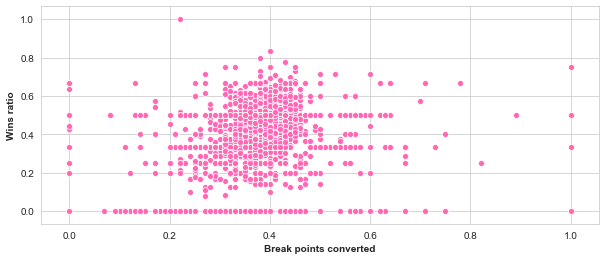

In [106]:
sns.set_style("whitegrid")
sns.set_palette("hls")

f,ax = plt.subplots(figsize=(10,4))
ax = sns.scatterplot(x=df.BreakPointsConverted,y = df.ratio_wins, data = df,color='hotpink')
ax.set_xlabel('Break points converted',weight='bold')
ax.set_ylabel('Wins ratio',weight='bold')
plt.show()

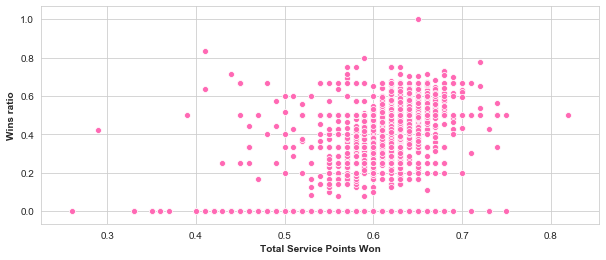

In [107]:
sns.set_style("whitegrid")
sns.set_palette("hls")

f2,ax2 = plt.subplots(figsize=(10,4))
ax2 = sns.scatterplot(x=df.TotalServicePointsWon,y = df.ratio_wins, data = df,color='hotpink')
ax2.set_xlabel('Total Service Points Won',weight='bold')
ax2.set_ylabel('Wins ratio',weight='bold')
plt.show()

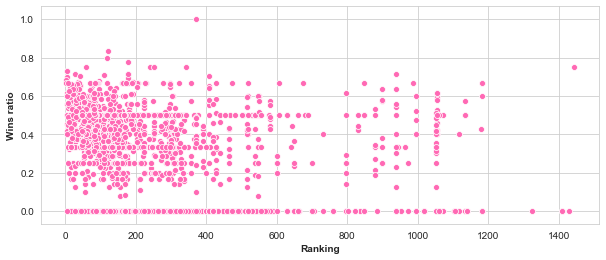

In [108]:
sns.set_style("whitegrid")
sns.set_palette("hls")

f3,ax3 = plt.subplots(figsize=(10,4))
ax3 = sns.scatterplot(x=df.Ranking,y = df.ratio_wins, data = df,color='hotpink')
ax3.set_xlabel('Ranking',weight='bold')
ax3.set_ylabel('Wins ratio',weight='bold')
plt.show()

En el gráfico anterior se observa una gran concentración de datos para los primeros rankings. Como la idea del proyecto es predecir resultados a partir del juego no vamos a considerar esta columna para la regresión.

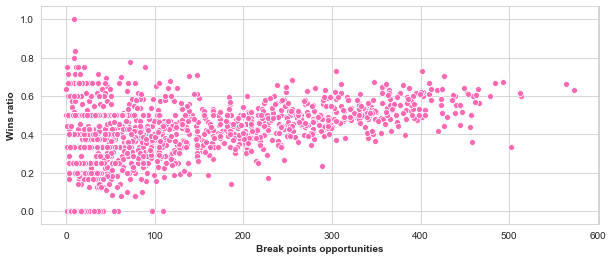

In [109]:
sns.set_style("whitegrid")
sns.set_palette("hls")

f5,ax5 = plt.subplots(figsize=(10,4))
ax5 = sns.scatterplot(x=df.BreakPointsOpportunities,y = df.ratio_wins, data = df,color='hotpink')
ax5.set_xlabel('Break points opportunities',weight='bold')
ax5.set_ylabel('Wins ratio',weight='bold')
plt.show()

En el gráfico anterior se observa que hay una relación lineal clara entre estas dos variables. Vamos a normalizar la columna entre 0 y 1.

In [110]:
df['BreakPointsOpportunities'] = (df.BreakPointsOpportunities - df.BreakPointsOpportunities.min()) / (df.BreakPointsOpportunities.max() - df.BreakPointsOpportunities.min())

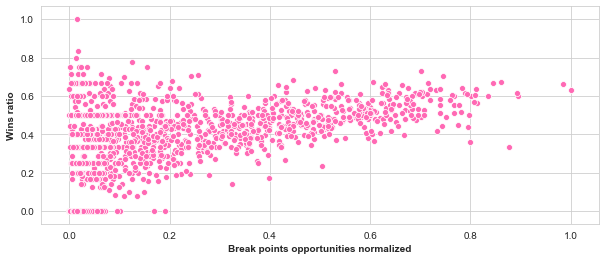

In [111]:
sns.set_style("whitegrid")
sns.set_palette("hls")

f6,ax6 = plt.subplots(figsize=(10,4))
ax6 = sns.scatterplot(x=df.BreakPointsOpportunities,y = df.ratio_wins, data = df,color='hotpink')
ax6.set_xlabel('Break points opportunities normalized',weight='bold')
ax6.set_ylabel('Wins ratio',weight='bold')
plt.show()

Vamos a hacer un modelo de regresión lineal simple a partir de las dos variables anteriores. Primero dividimos el dataset en 80% para entrenamiento y 20% para test.

In [112]:
x_train,x_test,y_train,y_test = train_test_split(df.BreakPointsOpportunities,df.ratio_wins,train_size=0.8,test_size=0.2,random_state = 1)

In [113]:
modelo1 = LinearRegression()
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)

modelo1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
pendiente = modelo1.coef_
oao = modelo1.intercept_

In [115]:
print(pendiente)
print(oao)

[0.54735354]
0.2268523112369574


Para determinar la calidad del modelo usamos el coeficiente de determinación

In [116]:
print(modelo1.score(x_test,y_test))

0.2507935624534009


Vamos a hacer un modelo de regresión multiple y evaluar si aumenta la calidad del modelo, para eso vamos a crear una tabla con todas las características que habiamos graficado anteriormente

In [117]:
df_2 = df[['BreakPointsOpportunities','TotalServicePointsWon','BreakPointsConverted']]
df_2.head()

,BreakPointsOpportunities,TotalServicePointsWon,BreakPointsConverted
0,0.012216,0.50,0.14
1,0.000000,0.57,0.00
2,0.013962,0.59,0.38
4,0.000000,0.50,0.00
5,0.003490,0.64,0.50


In [118]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(df_2,df.ratio_wins,train_size=0.8,test_size=0.2,random_state = 6)

In [120]:
model2 = LinearRegression()
model2.fit(x_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
print(model2.score(x_test2,y_test2))

0.30821376927873745


Como se observa, la calidad del modelo aumentó, sin embargo no es un modelo muy eficiente para realizar este tipo de predicciones